# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [23]:
app_train['AMT_INCOME_TOTAL_CUT'] = pd.cut(app_train['AMT_INCOME_TOTAL'], [-np.inf, 50000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000,300000, np.inf])
income_groups = app_train.groupby('AMT_INCOME_TOTAL_CUT').mean()
income_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
AMT_INCOME_TOTAL_CUT,,,,,,,,,,,,,,,,,,,,,
"(-inf, 50000.0]",273728.492805,0.075935,0.082134,0.141466,0.666371,0.301749,43016.868689,294668.663272,14228.968120,262813.662783,...,0.000221,0.000000,0.000443,0.007473,0.004599,0.028744,0.134234,0.207243,1.464214,0.561213
"(50000.0, 100000.0]",278081.197496,0.082493,0.120495,0.201298,0.688633,0.397442,80749.842364,394279.847721,18565.165751,351561.375476,...,0.000355,0.000490,0.000220,0.005435,0.006522,0.031628,0.179325,0.236653,1.675295,0.295568
"(100000.0, 120000.0]",278377.282550,0.087313,0.108630,0.262141,0.694165,0.405358,111732.619504,480997.061682,22191.677401,428776.966356,...,0.000454,0.000353,0.000227,0.005985,0.005955,0.032097,0.218692,0.254868,1.842881,0.202200
"(120000.0, 140000.0]",278039.816553,0.084846,0.097900,0.312194,0.690803,0.417195,132875.700265,544324.891758,24869.032931,486151.141517,...,0.000553,0.000531,0.000574,0.006641,0.006739,0.033351,0.248247,0.259924,1.907179,0.168970
"(140000.0, 160000.0]",278034.585430,0.087323,0.083262,0.339002,0.698400,0.412769,155523.666634,600393.809447,27102.190122,536843.274332,...,0.000519,0.000489,0.000519,0.007165,0.007060,0.035093,0.268158,0.275778,1.965012,0.154708
"(160000.0, 180000.0]",278535.786918,0.083742,0.078997,0.391287,0.689990,0.429769,177192.188224,654557.116970,29367.023295,587301.694303,...,0.000524,0.000585,0.000524,0.006747,0.006852,0.035554,0.288911,0.283282,1.993218,0.134085
"(180000.0, 200000.0]",275644.957129,0.073779,0.057079,0.368146,0.688684,0.384845,190560.666210,712273.832004,30534.091600,639478.545613,...,0.001994,0.000997,0.000499,0.005568,0.012249,0.043151,0.287862,0.277561,1.961860,0.164008
"(200000.0, 220000.0]",278510.285656,0.081405,0.071084,0.404942,0.710174,0.420501,204170.522674,701691.982356,31176.448764,631082.555205,...,0.000966,0.000508,0.000153,0.006849,0.006849,0.038071,0.309475,0.282534,2.069749,0.126608
"(220000.0, 240000.0]",278868.793263,0.075578,0.088910,0.452984,0.692919,0.440800,225559.548396,745580.750618,33282.390562,672982.802306,...,0.000618,0.000574,0.000221,0.006993,0.007692,0.036162,0.321213,0.278957,2.009390,0.110895


In [24]:
app_train['AMT_INCOME_TOTAL_CUT'].value_counts()

(50000.0, 100000.0]     59181
(120000.0, 140000.0]    47038
(100000.0, 120000.0]    39639
(140000.0, 160000.0]    32752
(160000.0, 180000.0]    32457
(300000.0, inf]         22739
(220000.0, 240000.0]    22652
(200000.0, 220000.0]    19667
(260000.0, 280000.0]    11950
(240000.0, 260000.0]     6890
(-inf, 50000.0]          4517
(280000.0, 300000.0]     4017
(180000.0, 200000.0]     4012
Name: AMT_INCOME_TOTAL_CUT, dtype: int64

([<matplotlib.axis.XTick at 0x227203a86a0>,
 [Text(0, 0, '(-inf, 50000.0]'),
  Text(0, 0, '(50000.0, 100000.0]'),
  Text(0, 0, '(100000.0, 120000.0]'),
  Text(0, 0, '(120000.0, 140000.0]'),
  Text(0, 0, '(140000.0, 160000.0]'),
  Text(0, 0, '(160000.0, 180000.0]'),
  Text(0, 0, '(180000.0, 200000.0]'),
  Text(0, 0, '(200000.0, 220000.0]'),
  Text(0, 0, '(220000.0, 240000.0]'),
  Text(0, 0, '(240000.0, 260000.0]'),
  Text(0, 0, '(260000.0, 280000.0]'),
  Text(0, 0, '(280000.0, 300000.0]'),
  Text(0, 0, '(300000.0, inf]')])

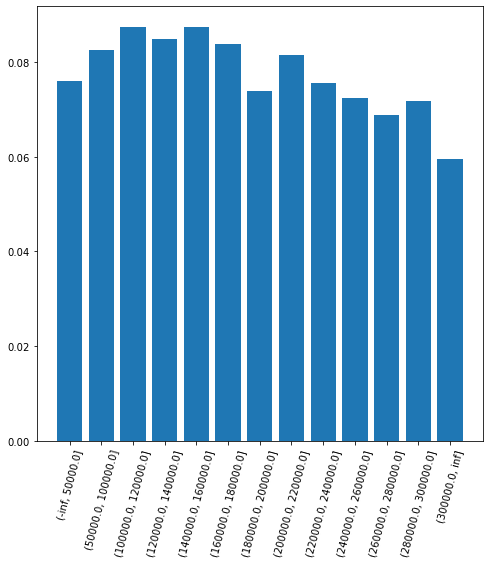

In [25]:
plt.figure(figsize = (8, 8))

plt.bar(range(len(income_groups.index)), income_groups['TARGET'])
plt.xticks(range(len(income_groups.index)), income_groups.index, rotation = 75)